In [164]:
import json
import os

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

SAVE_PLOTS = False

# image save path
image_save_path = 'plots'

In [165]:
# load the predictions
# teacher predictions
teacher_mcd_results = {'1': None, '10': None, '20': None, '30': None, '40': None, '50': None}
for k in teacher_mcd_results.keys():
    with open(f'../out/bert_teacher/final_e3_lr2_hd020_ad020_cd030/results/results_{k}.json', 'r') as f:
        teacher_mcd_results[k] = json.load(f)
    
# student predictions - possible condidates for best student model
# shen=0.5, lr=0.0002, e=2;
# shen=1, lr=0.000002, e=4
# shen=2, lr=0.0002, e=4 <-- current choice, also best in terms of AUC
# shen=2, lr=0.00002, e=2
with open('../out/bert_student/m5_k10/shen_2_lr0.0002_e4/results/results.json', 'r') as f:
    student_mc_results = json.load(f)
    
# augmented student
# shen=2, lr=0.0002, e=2
with open('../out/bert_student_augmented/m5_k10/shen_2_lr0.0002_e2_augmented/results/results.json', 'r') as f:
    student_augmented_mc_results = json.load(f)

In [166]:
SMALL_SIZE = 14
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rcParams["font.family"] = "serif"

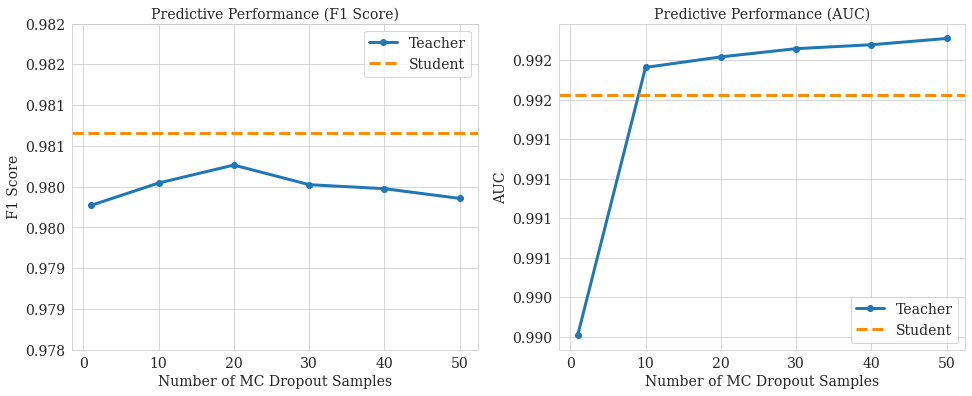

In [168]:
from matplotlib.ticker import StrMethodFormatter

# plot teacher f1 score vs k and auc score vs k
plt.subplots(1, 2, figsize=(16, 6))
# plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.3f}'))

# add grid
plt.grid(True)
teacher_f1 = [teacher_mcd_results[k]['f1_score'] for k in teacher_mcd_results.keys()]
teacher_k = [int(k) for k in teacher_mcd_results.keys()]
plt.plot(teacher_k, teacher_f1, 'o-', lw=3, label='Teacher')
plt.ylim(0.978, 0.982)
plt.xlabel('Number of MC Dropout Samples')
plt.ylabel('F1 Score')
plt.title('Predictive Performance (F1 Score)')
# add student f1 score
plt.axhline(student_mc_results['f1_score'], color='darkorange', linestyle='--', lw=3, label='Student')
# add augmented student f1 score
# plt.axhline(student_augmented_mc_results['f1_score'], color='green', linestyle='--', lw=3, label='Augmented Student')
plt.legend()

plt.subplot(1, 2, 2)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.3f}'))

# add grid
plt.grid(True)
teacher_f1 = [teacher_mcd_results[k]['auc_score'] for k in teacher_mcd_results.keys()]
teacher_k = [int(k) for k in teacher_mcd_results.keys()]
plt.plot(teacher_k, teacher_f1, 'o-', lw=3, label='Teacher')
# plt.ylim(0.978, 0.99)
plt.xlabel('Number of MC Dropout Samples')
plt.ylabel('AUC')
plt.title('Predictive Performance (AUC)')
# add student auc score
plt.axhline(student_mc_results['auc_score'], color='darkorange', linestyle='--', lw=3, label='Student')
# add augmented student auc score
# plt.axhline(student_augmented_mc_results['auc_score'], color='green', linestyle='--', lw=3, label='Augmented Student')
plt.legend()
if SAVE_PLOTS:
    plt.tight_layout()
    plt.savefig(os.path.join(image_save_path, f"plot_f1_auc_teacher_student.pdf"))
    plt.close()

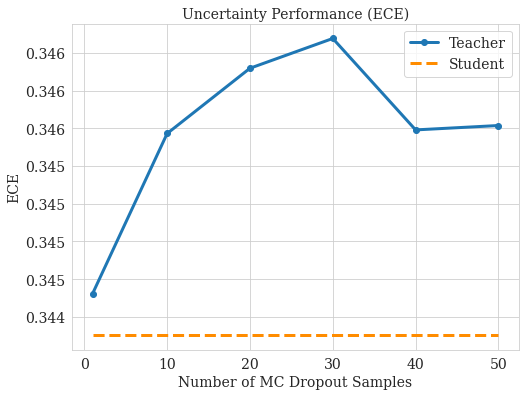

In [169]:
# plot teacher ece score and brier score vs k
plt.figure(figsize=(8, 6))
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.3f}'))

# add grid
plt.grid(True)
teacher_f1 = [teacher_mcd_results[k]['ece_score'] for k in teacher_mcd_results.keys()]
teacher_k = [int(k) for k in teacher_mcd_results.keys()]
plt.plot(teacher_k, teacher_f1, 'o-', lw=3, label='Teacher')
plt.xlabel('Number of MC Dropout Samples')
plt.ylabel('ECE')
plt.title('Uncertainty Performance (ECE)')
# plt.ylim(0.34, 0.35)
# add student ece score
student_ece = student_mc_results['ece_score']
# augmented_student_ece = student_augmented_mc_results['ece_score']
xmin = min(teacher_k)
xmax = max(teacher_k)
plt.hlines(student_ece, xmin, xmax, colors='darkorange', linestyles='--', lw=3, label='Student')
# plt.hlines(augmented_student_ece, xmin, xmax, colors='green', linestyles='--', lw=3, label='Augmented Student')
plt.legend()
if SAVE_PLOTS:
    plt.tight_layout()
    plt.savefig(os.path.join(image_save_path, f"plot_ece_teacher_student.pdf"))
    plt.close()

In [161]:
teacher_mcd_results['1'].keys()

dict_keys(['average_inference_time', 'f1_score', 'auc_score', 'avg_bald', 'ece_score'])

KeyError: 'brier_score'

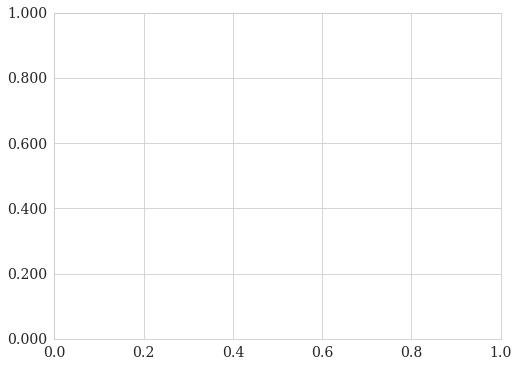

In [160]:
# plot teacher brier score vs k
plt.figure(figsize=(8, 6))
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.3f}'))

# add grid
plt.grid(True)
teacher_f1 = [teacher_mcd_results[k]['brier_score'] for k in teacher_mcd_results.keys()]
teacher_k = [int(k) for k in teacher_mcd_results.keys()]
plt.plot(teacher_k, teacher_f1, 'o-', lw=3, label='Teacher')
plt.xlabel('Number of MC Dropout Samples')
plt.ylabel('Brier Score')
plt.title('Uncertainty Performance (Brier Score)')
# add student brier score
student_brier = student_mc_results['brier_score']
augmented_student_brier = student_augmented_mc_results['brier_score']
xmin = min(teacher_k)
xmax = max(teacher_k)
plt.hlines(student_brier, xmin, xmax, colors='darkorange', linestyles='--', lw=3, label='Student')
plt.hlines(augmented_student_brier, xmin, xmax, colors='green', linestyles='--', lw=3, label='Augmented Student')
plt.legend();


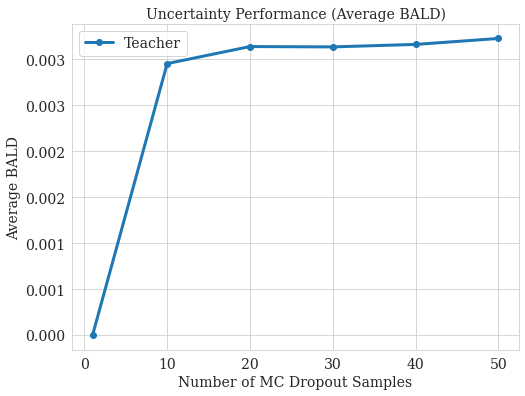

In [149]:
# plot teacher avg bald score vs k
plt.figure(figsize=(8, 6))
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.3f}'))

# add grid
plt.grid(True)
teacher_avg_bald = [teacher_mcd_results[k]['avg_bald'] for k in teacher_mcd_results.keys()]
teacher_k = [int(k) for k in teacher_mcd_results.keys()]
plt.plot(teacher_k, teacher_avg_bald, 'o-', lw=3, label='Teacher')
plt.xlabel('Number of MC Dropout Samples')
plt.ylabel('Average BALD')
plt.title('Uncertainty Performance (Average BALD)')
# add student ece score
student_avg_bald = np.mean(student_mc_results['bald_score'])
xmin = min(teacher_k)
xmax = max(teacher_k)
# plt.hlines(student_ece, xmin, xmax, colors='darkorange', linestyles='--', lw=3, label='Student')
plt.legend();

In [150]:
print("Student avg. BALD score: ", np.mean(student_mc_results['bald_score']))
print("Augmented Student avg. BALD score: ", np.mean(student_augmented_mc_results['bald_score']))

Student avg. BALD score:  0.006128525281914432
Augmented Student avg. BALD score:  0.006784983642710002


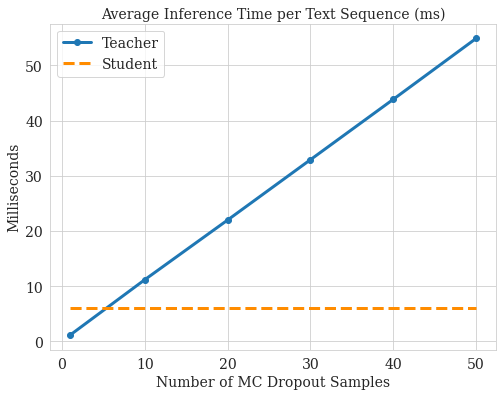

In [170]:
# plot teacher avg inference time score vs k
plt.figure(figsize=(8, 6))

# add grid
plt.grid(True)
teacher_f1 = [teacher_mcd_results[k]['average_inference_time'] for k in teacher_mcd_results.keys()]
teacher_k = [int(k) for k in teacher_mcd_results.keys()]
plt.plot(teacher_k, teacher_f1, 'o-', lw=3, label='Teacher')
plt.xlabel('Number of MC Dropout Samples')
plt.ylabel('Milliseconds')
plt.title('Average Inference Time per Text Sequence (ms)')
# add student avg inference time
student_avg_time = student_mc_results['average_inference_time']
xmin = min(teacher_k)
xmax = max(teacher_k)
plt.hlines(student_avg_time, xmin, xmax, colors='darkorange', linestyles='--', lw=3, label='Student')
plt.legend()
if SAVE_PLOTS:
    plt.tight_layout()
    plt.savefig(os.path.join(image_save_path, f"plot_avg_inference_time_teacher_student.pdf"))
    plt.close()

student has slight overhead due to MC sampling from logits

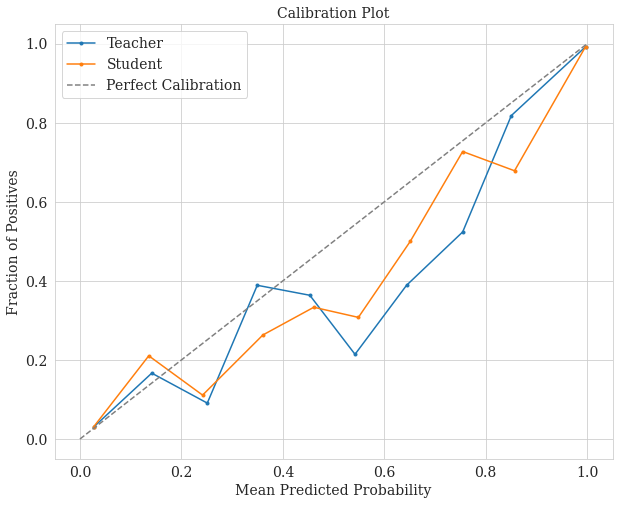

In [171]:
# calibration plot
from sklearn.calibration import calibration_curve

with open(f'../out/bert_teacher/final_e3_lr2_hd020_ad020_cd030/results/results.json', 'r') as f:
        teacher_results = json.load(f) # these are actually the results from the MCD model!

plt.figure(figsize=(10, 8))

# teacher
fop, mpv = calibration_curve(y_true=teacher_results['y_true'], y_prob=teacher_results['y_prob'], n_bins=10, normalize=True)
plt.plot(mpv, fop, marker='.', label='Teacher')
# student
fop, mpv = calibration_curve(y_true=student_mc_results['y_true'], y_prob=student_mc_results['y_prob'], n_bins=10, normalize=True)
plt.plot(mpv, fop, marker='.', label='Student')

plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Perfect Calibration')

# augmented student
# fop, mpv = calibration_curve(y_true=student_augmented_mc_results['y_true'], y_prob=student_augmented_mc_results['y_prob'], n_bins=10, normalize=True)
# plt.plot(mpv, fop, marker='.', color='green', label='Augmented Student')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Plot')
plt.legend()
if SAVE_PLOTS:
    plt.tight_layout()
    plt.savefig(os.path.join(image_save_path, f"plot_calibration_plot_teacher_student.pdf"))
    plt.close()

In [153]:
# f1 score
teacher_results['f1_score'], student_mc_results['f1_score'], student_augmented_mc_results['f1_score']
# augmented student > student > teacher

(0.9799758745476479, 0.9806576402321083, 0.9820213799805636)

In [154]:
# brier score
teacher_results['brier_score'], student_mc_results['brier_score'], student_augmented_mc_results['brier_score']
# augmented student > teacher > student

(0.02421403987034935, 0.024903782388658317, 0.02403716299954644)

In [155]:
# ece score
teacher_results['ece_score'], student_mc_results['ece_score'], student_augmented_mc_results['ece_score']
# student > augmented student > teacher

(0.3457771061929799, 0.3441301544278075, 0.34460585905099667)

In [156]:
# entropy
from scipy.stats import entropy

teacher_entropy = entropy(teacher_results['y_prob'])
student_entropy = entropy(student_mc_results['y_prob'])
student_augmented_entropy = entropy(np.array(student_augmented_mc_results['y_prob']))

teacher_entropy, student_entropy, student_augmented_entropy # the higher, the more uncertain (flatter distribution)
# augmented student > student > teacher 

# corresponds to high-entropy posterior distribution

(7.688377053151901, 7.6867950128370675, 7.683956997097316)

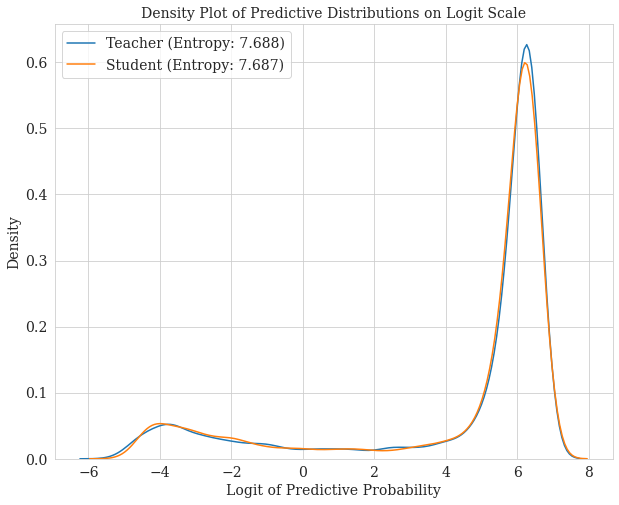

In [173]:
# similarity of predictive distributions - cdf plot
from scipy.special import logit
import seaborn as sns

# Transforming data using logit function to better visualize skewed data
teacher_logit_dist = logit(np.array(teacher_results['y_prob']))
student_logit_dist = logit(np.array(student_mc_results['y_prob']))
# logit_dist3 = logit(np.array(student_augmented_mc_results['y_prob']))

plt.figure(figsize=(10, 8))
sns.kdeplot(teacher_logit_dist, bw_adjust=0.5, label=f'Teacher (Entropy: {teacher_entropy:.3f})')
sns.kdeplot(student_logit_dist, bw_adjust=0.5, label=f'Student (Entropy: {student_entropy:.3f})')
#sns.kdeplot(logit_dist3, bw_adjust=0.5, label='Distribution 3')
plt.xlabel('Logit of Predictive Probability')
plt.ylabel('Density')
plt.title('Density Plot of Predictive Distributions on Logit Scale')
plt.legend()
plt.grid(True)
if SAVE_PLOTS:
    plt.tight_layout()
    plt.savefig(os.path.join(image_save_path, f"plot_density_logit_teacher_student.pdf"))
    plt.close()

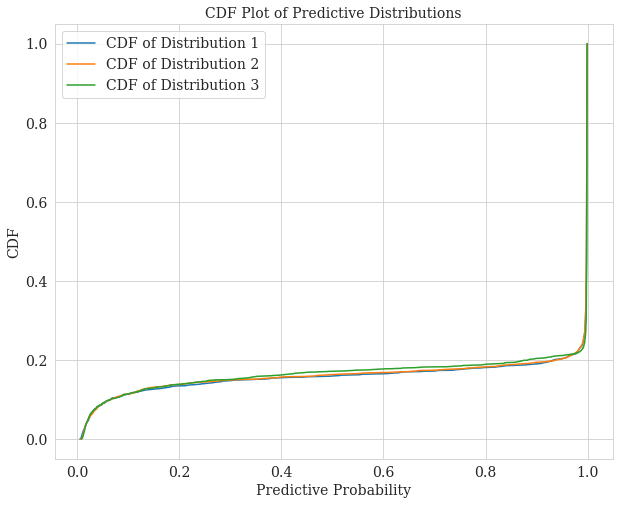

In [158]:
def calculate_cdf(data):
    # Sort data
    data_sorted = np.sort(data)
    # Calculate CDF values
    cdf = np.arange(1, len(data) + 1) / len(data)
    return data_sorted, cdf

# Calculate CDF for each distribution
data_sorted1, cdf1 = calculate_cdf(np.array(teacher_results['y_prob']))
data_sorted2, cdf2 = calculate_cdf(np.array(student_mc_results['y_prob']))
data_sorted3, cdf3 = calculate_cdf(np.array(student_augmented_mc_results['y_prob']))

plt.figure(figsize=(10, 8))
plt.plot(data_sorted1, cdf1, label='CDF of Distribution 1')
plt.plot(data_sorted2, cdf2, label='CDF of Distribution 2')
plt.plot(data_sorted3, cdf3, label='CDF of Distribution 3')
plt.xlabel('Predictive Probability')
plt.ylabel('CDF')
plt.title('CDF Plot of Predictive Distributions')
plt.legend()
plt.grid(True)
plt.show()

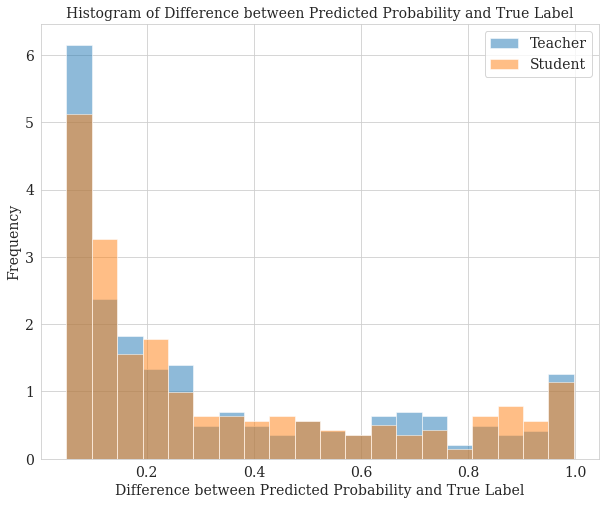

In [159]:
# histogram of difference between predicted probability and true label
plt.figure(figsize=(10, 8))
# need to turn lists in np arrays   
student_mc_results['y_true'] = np.array(student_mc_results['y_true'])
student_mc_results['y_prob'] = np.array(student_mc_results['y_prob'])
# student_augmented_mc_results['y_true'] = np.array(student_augmented_mc_results['y_true'])
# student_augmented_mc_results['y_prob'] = np.array(student_augmented_mc_results['y_prob'])
teacher_results['y_true'] = np.array(teacher_results['y_true'])
teacher_results['y_prob'] = np.array(teacher_results['y_prob'])

diff_student = np.abs(student_mc_results['y_true'] - student_mc_results['y_prob'])
# diff_augmented_student = np.abs(student_augmented_mc_results['y_true'] - student_augmented_mc_results['y_prob'])
diff_teacher = np.abs(teacher_results['y_true'] - teacher_results['y_prob']) 

cropped_diff_student = diff_student[diff_student > 0.05]
# cropped_diff_augmented_student = diff_augmented_student[diff_augmented_student > 0.05]
cropped_diff_teacher = diff_teacher[diff_teacher > 0.05]

plt.hist(diff_teacher[diff_teacher > 0.05], bins=20, alpha=0.5, label='Teacher', density=True)
plt.hist(diff_student[diff_student > 0.05], bins=20, alpha=0.5, label='Student', density=True)
# plt.hist(diff_augmented_student[diff_augmented_student > 0.05], bins=20, alpha=0.5, label='Augmented Student', density=True)
plt.xlabel('Difference between Predicted Probability and True Label')
plt.ylabel('Frequency')
plt.title('Histogram of Difference between Predicted Probability and True Label')
plt.legend();

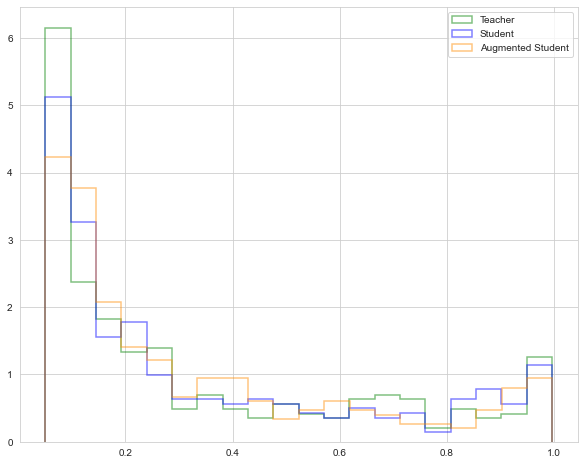

In [74]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.hist(diff_teacher[diff_teacher > 0.05], 20, ec='green', fc='none', lw=1.5, histtype='step', label='Teacher', alpha=.5, density=True)
ax.hist(diff_student[diff_student > 0.05], 20, ec='blue', fc='none', lw=1.5, histtype='step', label='Student', alpha=.5, density=True)
ax.hist(diff_augmented_student[diff_augmented_student > 0.05], 20, ec='darkorange', fc='none', lw=1.5, histtype='step', label='Augmented Student', alpha=.5, density=True)
ax.legend()
plt.show()

# TODO: remove lines on the sides? see ChatGPT

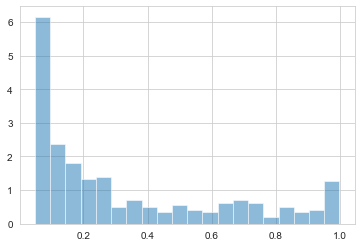

In [57]:
plt.hist(diff_teacher[diff_teacher > 0.05], bins=20, alpha=0.5, label='Teacher', density=True);
# lots of extreme predictions, less in the middle

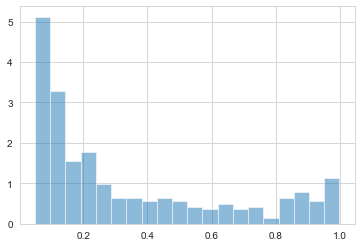

In [53]:
plt.hist(diff_student[diff_student > 0.05], bins=20, alpha=0.5, label='Student', density=True);
# less extreme predictions than teacher

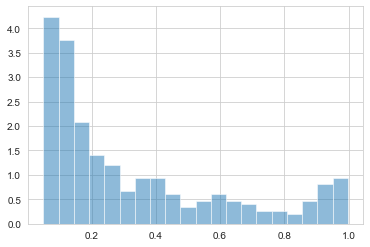

In [55]:
plt.hist(diff_augmented_student[diff_augmented_student > 0.05], bins=20, alpha=0.5, label='Augmented Student', density=True);
# less extreme predictions than student

### On Calibration

- 1.) ChatGPT notes, including L2 ECE vs. L1 ECE vs. Brier Score vor measuring calibration and calibration error
- 2.) calibration curve
- 3.) other plot interpretations


1.)
**L1 vs L2**
- L1 norm (Manhattan distance) measures the absolute differences between predicted probabilities and actual outcomes. It is less sensitive to large errors because it doesn't square the differences.
- L2 norm (Euclidean distance) squares the differences between predicted probabilities and actual outcomes before averaging them, which makes it more sensitive to larger errors.

Hence, if a model has some predictions that are significantly miscalibrated, the ECE calculated with the L2 norm is expected to be higher than that calculated with the L1 norm, because these larger errors will have a more pronounced effect on the calculation.

**Effect of number of bins**
- Increased Number of Bins (from 10 to 30): Increasing the number of bins provides a finer granularity in evaluating the model's calibration. This can lead to a more detailed understanding of where the model may be miscalibrated. However, with more bins, each bin has fewer samples, which can increase the variance of the ECE estimate. The effect on the ECE value can go either way: it might increase if miscalibrations are more finely captured, or it might decrease if the model's calibration errors are more evenly distributed or minor.

**ECE and Class Imbalance**

- Imbalanced Classes: In datasets where one class significantly outnumbers the other(s), models might learn to predict the majority class more frequently, affecting their calibration. For instance, in a highly imbalanced dataset, a model might learn to predict the majority class with high confidence, which can skew its predicted probabilities and potentially lead to poor calibration for the minority class.
- ECE Sensitivity: ECE might not fully capture the effects of class imbalance on model calibration, especially if the imbalance is severe. Since ECE is an aggregate measure, it might show that a model is well-calibrated if the predictions for the majority class are accurate, even if the model performs poorly on the minority class. This is because the minority class, having fewer instances, contributes less to the overall ECE calculation.

In scenarios with imbalanced classes, it is also beneficial to look into class-specific calibration measures or to use stratified approaches when calculating ECE to ensure that the calibration of predictions for all classes is adequately assessed. This can involve separately evaluating the calibration for each class or using metrics like the Brier score that can be decomposed to provide more insights into model performance across different classes.

**ECE and Brier Score**
Explaining Low Brier Score with High ECE

Several factors could explain this seemingly paradoxical situation:

- Class Imbalance with Predominantly Accurate Predictions:
    In cases of class imbalance, if the model almost always accurately predicts the majority class with high probability, the Brier Score could be low because the squared errors for these predictions are small. However, if the model's predictions for the minority class are poorly calibrated (either too confident or not confident enough), the ECE could be high because ECE is sensitive to mismatches between predicted probabilities and actual outcomes.

- Consistently Inaccurate Probability Estimates for a Subset of Predictions:
    The model might produce very accurate predictions for a large portion of the dataset, contributing to a low Brier Score. However, if there is a subset of predictions where the model consistently overestimates or underestimates probabilities, this could lead to a high ECE. The Brier Score might not capture the severity of these miscalibrations if they are relatively few or if the squared error impact is diluted across the dataset.

- Poor Model Performance on a Critical Subset of Data:
    If the model performs poorly on a critical but relatively small subset of the data, it might still achieve a low overall Brier Score, especially if it performs very well on the rest of the data. However, poor calibration on this critical subset could significantly increase the ECE, highlighting the importance of calibration across all subsets of data.

- Differences in Sensitivity to Calibration and Discrimination:
    The Brier Score is influenced by both the calibration and the sharpness (or discrimination) of the predictions. A model might have good discrimination (accurately distinguishing between classes) and thus a low Brier Score, but it can still be poorly calibrated (the probabilities are not well aligned with actual outcomes), leading to a high ECE.

- Inappropriate Binning Strategy for ECE:
    The choice of binning strategy (number of bins, binning method) in calculating ECE can sometimes exaggerate calibration issues if not appropriately matched to the model's output distribution. This could artificially inflate the ECE in comparison to the Brier Score, which does not rely on binning.


2.)
**Calibration Curve**
- helps visualize the relationship between predicted probabilities and actual outcomes
- can reveal whether a model tends to under-predict or over-predict the actual outcomes across different ranges of predicted probabilities
- perfectly calibrated model is represented by the dashed diagonal line; it indicates where the predicted probabilities exactly match the actual frequencies. For a perfectly calibrated model, if it predicts events with 70% probability, then those events should indeed occur about 70% of the time.

**teacher**
- in the lower probabilities (from 0 to about 0.2), the teacher model tends to slightly under-predict the actual outcomes, meaning the events occur more frequently than predicted
- between 0.2 and 0.5, the trend is inconsistent, but the model generally over-predicts the actual outcomes
- between approximately 0.5 and 0.8, the model substantially over-predicts the actual outcomes
- near the high end (close to 1.0), the teacher model aligns closely with perfect calibration, suggesting accurate predictions for high-confidence events

**student**
- student model's calibration curve generally shows a less pronounced deviation from the line of perfect calibration, indicating more reliable predicted probabilities
- in the lower probabilities (from 0 to about 0.2), the student model tends to also slightly under-predict the actual outcomes, more than the teacher
- above 0.2, the model's predicted probabilities are on average closer to the actual frequencies compared to the teacher's but still over-predict; for the highest predicted probabilities (close to 1.0), the Student model's predictions are again closer to the line of perfect calibration but not as close as the teacher's predictions

general observation: student is better-calibrated around the 0.5 threshold, but not as well-calibrated at the extremes as the teacher
If a model is well-calibrated around this 0.5 threshold, it implies that it can reliably distinguish between the positive and negative classes. For example, when the model predicts a probability of 0.6, ideally, 60% of such predictions should indeed belong to the positive class. This local calibration is crucial in practice because it directly affects decision-making based on model predictions. However, the overall calibration of a model is a global property that looks at how well the predicted probabilities match the actual outcomes across the entire probability spectrum, not just at or near the 0.5 threshold. Thus, while better calibration near the 0.5 threshold can be very practical and beneficial, it doesn't necessarily imply that the model is better calibrated overall.

For Practical Purposes: If most decisions hinge on the 0.5 threshold, a model that is well-calibrated in this region might be preferable even if it's less calibrated elsewhere. The precision and recall of the model at this threshold would also be key performance indicators.

For Overall Calibration: To claim a model is well-calibrated overall, it should have predicted probabilities that closely correspond to the true probabilities across all ranges, not just near the 0.5 threshold. This would be reflected in a low ECE score and a calibration plot that closely follows the perfectly calibrated line across the full range of probabilities.


3.)
- histogram of difference between predicted probability and true label
    - provides basically same information as entropy -> does the model tend to make more confident predictions or not
    - observe: teacher has more extreme predictions than student and augmented student, augmented student has the least extreme predictions